# Covid-19 forecasting 

## Введение. Постановка целей и задач.

**COVID-19 - это вызывающий заболевание штамм коронавируса, появившийся в декабре 2019 года и приведший к продолжающейся глобальной пандемии. Возможность предвидеть путь пандемии имеет решающее значение. Это важно для того, чтобы определить, как бороться, и отследить его распространение.**

**В рамках исследования распространения вируса на островном государстве, на примере Японии, проведем анализ данных о заболеваемости, предложим прогностическую модель и  сравним с новой статистикой**

## Импорт библиотек, ознакомление с данными.

### Импорт Датафрейма, библиотек, написание функций.

В этом блоке мы импортируем все, что нам нужно для работы: библиотеки, отдельные функции, сам датасет.

In [34]:
## Здесь импортируем библиотеки и функции 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
## Здесь импортируем данные.
df = pd.read_csv('./owid-covid-data.csv', index_col='date', parse_dates = True)
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,ZWE,Africa,Zimbabwe,167140.0,0.0,4013.429,4738.0,0.0,4.000,11074.616,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-14,ZWE,Africa,Zimbabwe,172012.0,4872.0,4344.429,4740.0,2.0,3.857,11397.432,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-15,ZWE,Africa,Zimbabwe,177690.0,5678.0,3866.000,4745.0,5.0,3.571,11773.654,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
## Обязательно проверьте, что все выгрузилось корректно.

### Знакомство с данными.

Этот блок посвящен первоначальному знакомству с данными

Наша задача - посмотреть на данные методами .info(), а также изучить их визуально.

Будет удобно рассматривать определенный блок - одну страну, один месяц одной страны.

Здесь же надо определиться с описанием данных - лучше всего для себя пояснить, с чем мы имеем дело. В данном случае столбцов слишком много, поэтому необходимо описать только самое важное - максимум 7-8 столбцов.

Как только у нас есть информация, что данные получены без ошибок, а также есть самое общее представление о содержимом, мы можем перейти к следующему пункту..

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148106 entries, 2020-02-24 to 2021-12-17
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    148106 non-null  object 
 1   continent                                   139164 non-null  object 
 2   location                                    148106 non-null  object 
 3   total_cases                                 145506 non-null  float64
 4   new_cases                                   145500 non-null  float64
 5   new_cases_smoothed                          144355 non-null  float64
 6   total_deaths                                128558 non-null  float64
 7   new_deaths                                  128754 non-null  float64
 8   new_deaths_smoothed                         144355 non-null  float64
 9   total_cases_per_million                     144826 non

## Предобработка данных

### Фильтрация данных

Обычно фильтрацию данных делают позже - когда нужно непосредственно работать с данными. В нашем случае это неудобно: у нас условие, по которому мы смотрим на 1 определенную страну. Поэтому здесь нужно **вывести список стран и выбрать 1 конкретную страну**. 

С другой стороны, столбцов в задании также дали многовато. Поэтому на этом этапе нам нужно избавиться от всех ненужных столбцов. Чтобы понять, какие столбцы нужны - лучше всего вспомнить суть задачи. 


По итогу у нас должен остаться небольшой **датасет** с данными по 1 стране и самыми нужными столбцами.

In [9]:
df.location.value_counts().index

Index(['Peru', 'Argentina', 'Mexico', 'Thailand', 'Taiwan', 'South Korea',
       'Lower middle income', 'Asia', 'Japan', 'Upper middle income',
       ...
       'Sint Maarten (Dutch part)', 'Kiribati', 'Cook Islands', 'Turkmenistan',
       'Tuvalu', 'Nauru', 'Palau', 'Tokelau', 'Pitcairn', 'Niue'],
      dtype='object', length=238)

In [23]:
df_lim = df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population', 'total_tests','people_fully_vaccinated','location']][df.location=='Japan']
df_lim

,total_cases,new_cases,total_deaths,new_deaths,population,total_tests,people_fully_vaccinated,location
date,,,,,,,,
2020-01-22,2.0,NaN,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-23,2.0,0.0,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-24,2.0,0.0,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-25,2.0,0.0,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-26,4.0,2.0,NaN,NaN,126050796.0,NaN,NaN,Japan
...,...,...,...,...,...,...,...,...
2021-12-13,1728090.0,67.0,18370.0,1.0,126050796.0,27236037.0,98105016.0,Japan
2021-12-14,1728218.0,128.0,18371.0,1.0,126050796.0,27284620.0,98157944.0,Japan
2021-12-15,1728377.0,159.0,18372.0,1.0,126050796.0,27333787.0,98190145.0,Japan


<AxesSubplot:xlabel='date'>

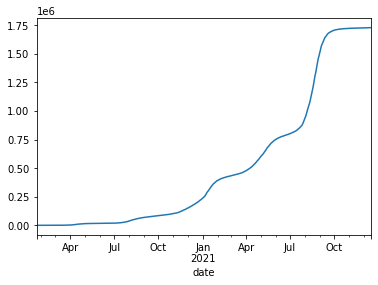

In [24]:
df[df.location=='Japan'].total_cases.plot() #количество подтвержденных случаев в Японии за весь срок

### Обработка пропусков

В этом блоке мы должны понять - почему у нас есть пропуски. Главный вопрос - какова их природа? 

После того, как мы это поймем, мы можем принять решение относительно заполнения пропусков.

Главный момент: **в рамках этого задания мы не удаляем ничего, связанного с пропусками!**

Главная причина - характер работы с данными: мы работаем в этой задаче с временным промежутком, и нам важно, чтобы не было отсутствующих дат. К примеру, ситуация, когда у нас есть пропуск продолжительностью от 1 до 3 дней в середине временного промежутка, попросту неприемлима.

После обработки пропусков нам обязательно нужно проверить - всё ли в порядке. Выведите данные и проверьте заполненность. Зафиксируйте то, что пропусков больше нет.

In [25]:
df_lim.isnull() #проверим, где в данных есть пропуски 

,total_cases,new_cases,total_deaths,new_deaths,population,total_tests,people_fully_vaccinated,location
date,,,,,,,,
2020-01-22,False,True,True,True,False,True,True,False
2020-01-23,False,False,True,True,False,True,True,False
2020-01-24,False,False,True,True,False,True,True,False
2020-01-25,False,False,True,True,False,True,True,False
2020-01-26,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...
2021-12-13,False,False,False,False,False,False,False,False
2021-12-14,False,False,False,False,False,False,False,False
2021-12-15,False,False,False,False,False,False,False,False


In [26]:
#df_lim.fillna (0.0, inplace = True)
#df_lim.fillna(df_lim.mean(), inplace = True)
df_lim

,total_cases,new_cases,total_deaths,new_deaths,population,total_tests,people_fully_vaccinated,location
date,,,,,,,,
2020-01-22,2.0,NaN,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-23,2.0,0.0,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-24,2.0,0.0,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-25,2.0,0.0,NaN,NaN,126050796.0,NaN,NaN,Japan
2020-01-26,4.0,2.0,NaN,NaN,126050796.0,NaN,NaN,Japan
...,...,...,...,...,...,...,...,...
2021-12-13,1728090.0,67.0,18370.0,1.0,126050796.0,27236037.0,98105016.0,Japan
2021-12-14,1728218.0,128.0,18371.0,1.0,126050796.0,27284620.0,98157944.0,Japan
2021-12-15,1728377.0,159.0,18372.0,1.0,126050796.0,27333787.0,98190145.0,Japan


### Вывод по этапу.


## EDA или разведочный анализ данных.

В данном блоке наша задача - познакомиться "поближе" с данными, которыми мы располагаем.

Что лучше всего сделать:    
- Сделать столбец с датами индексом;
- Вывести статистику по нужным столбцам;
- Построить графическое отображение столбцов;
- Попробовать определить - есть ли столбцы, которые мы можем отфильтровать (к примеру, самые ранние записи, где информации могло не быть и где были NaN). **- такого может и не быть**


Проделав действия выше, мы выполним минимум, необходимый для дальнейшей работы. 

Помимо этой информации, здесь же нужно всесторонне познакомиться с рассматриваемыми данными в контексте процесса/явления:    
- С чем связан рост или падение метрики в столбце? (почему заболеваемость может расти или падать)
- Как можно охарактеризовать зависимость по метрике? 

Хорошо здесь описать всё, что влияет на метрику, и что может нам помочь определить следующее: можем ли мы достоверно предсказать рост или падение метрики на основании одной переменной? Или здесь нужны методы посложнее, с большим числом входных данных и зависимостей?

Отвечайте на вопросы честно! 

In [27]:
df_lim.describe() #статистика по столбцам

,total_cases,new_cases,total_deaths,new_deaths,population,total_tests,people_fully_vaccinated
count,6.960000e+02,695.000000,674.000000,674.000000,696.0,6.780000e+02,2.220000e+02
mean,5.185998e+05,2487.336691,7296.695846,27.262611,126050796.0,8.721297e+06,3.582375e+07
std,5.996171e+05,4301.267772,6794.658524,30.200925,0.0,8.972467e+06,3.606433e+07
min,2.000000e+00,0.000000,1.000000,0.000000,126050796.0,4.000000e+00,3.500000e+01
25%,2.233575e+04,203.500000,1008.500000,4.250000,126050796.0,6.124485e+05,1.916580e+06
50%,2.469135e+05,950.000000,4381.000000,14.000000,126050796.0,5.055346e+06,2.322746e+07
75%,7.944205e+05,2684.500000,14825.750000,45.000000,126050796.0,1.563214e+07,6.959187e+07
max,1.728701e+06,25992.000000,18375.000000,216.000000,126050796.0,2.738397e+07,9.822253e+07


<AxesSubplot:xlabel='date'>

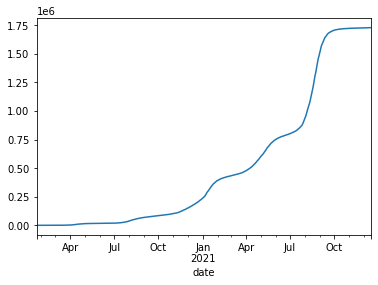

In [35]:
df_lim.total_cases.plot()

<AxesSubplot:xlabel='date'>

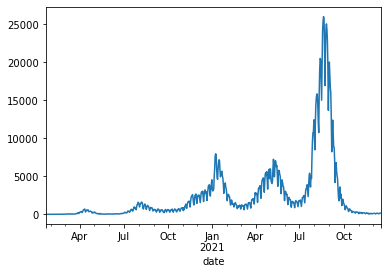

In [36]:
df_lim.new_cases.plot()

<AxesSubplot:xlabel='date'>

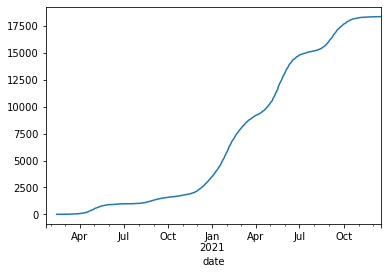

In [37]:
df_lim.total_deaths.plot()

<AxesSubplot:xlabel='date'>

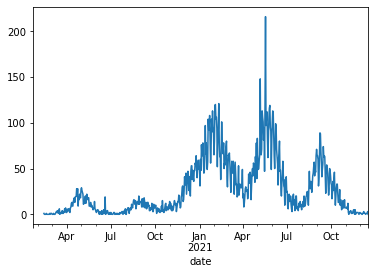

In [38]:
df_lim.new_deaths.plot()

<AxesSubplot:xlabel='date'>

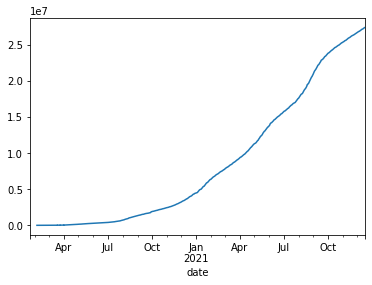

In [39]:
df_lim.total_tests.plot()

<AxesSubplot:xlabel='date'>

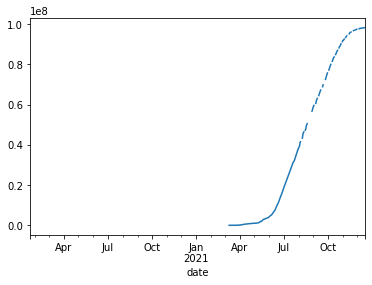

In [40]:
df_lim.people_fully_vaccinated.plot()

Как только мы поняли, что описанной информации достаточно - можно перейти к следующему пункту.

## Построение моделей, анализ результатов.

Данный блок содержит в себе решение поставленной задачи.

В прошлых блоках мы убедились в целостности данных, их логичности, а также в том, что мы понимаем, с чем мы имеем дело. 

На этом этапе у нас должен быть объект типа DataFrame или Series, где индекс - даты, а в значениях находится нужная информация. То есть временной ряд.

В данном блоке у нас должно быть от трёх до четырех подглав:    
- Разделение датасета на тренировочную и тестовую (валидационную) выборки, проверка на статичность, построение графиков автокорреляции и частичной автокорреляции, разбивка на сезонность и тренд.
- Применение 1 способа прогнозирования;
- Применение 2 способа прогнозирования;
- (Применение 3 способа прогнозирования); **По желанию**

Первый пункт - разделение датасета - универсален, данные из него не нужно обновлять или заного рассчитывать.

Остальные три пункта содержат примерно одинаковый алгоритм действий:    
1. Описываем вкратце модель.
2. Создаем модель.
3. Обучаем модель.
4. Создаем прогноз.
5. Сравниваем прогноз и предсказание. 
6. Рассчитываем качество полученной модели и прогноза.
7. Делаем выводы по прогнозу.


Какие модели у нас есть:
- В рамках курса мы рассмотрели модель ARIMA, её улучшенную версию SARIMA. Обязательно попробуйте использовать эту модель;
- Модель экспаненционного сглаживающего среднего;
- Модель Хольта-Винтерса.

Последние 2 модели мы не изучали, поэтому можно попробовать использовать составные от модели ARIMA, которые мы рассматривали в лекции - AR, MA.

После получения прогноза отобразите графики **прогноз vs факт**, чтобы визуально можно было посмотреть на то, как точно построен прогноз. 

Как понять, подходит ли модель. Попробуйте использовать следующие методы рассчета ошибки:
- MAPE или средняя абсолютная ошибка в процентах.
- RMSE - квадратный корень из среднеквадратичной ошибки.
- MSE - среднеквадратичный корень (связан  с RMSE).

В конце - сравните полученные метрики с ошибками и выберите ту модель, которая точнее всего создает прогноз.

Ещё один важный момент - горизонт прогнозирования и сравнение прогноза с данными. Горизонт планирования нужно сделать небольшим - примерно 10-15 наблюдений (то есть 10-15 дней). И в ошибку нужно сравнивать с таким же числом наблюдений за тот же период по реальным данным!

Также отмечу, что прогноз, скорее всего, будет не самым точным, а возможно, он совсем покажет что-то непонятное. С учетом того, насколько сложен процесс распространения коронавирусной инфекции, можно с уверенностью сказать, что обычный анализ временного ряда врядли даст очень хороший результат. Иначе бы у ученых-прогнозистов не было проблем с предзказанием коронавирусной инфекии 🙌.

## Выводы

В данном блоке опишите общие выводы по работе: что было сделано, что было получено. Помните, отрицательный результат - тоже результат. Поэтому указывайте информацию честно и беспристратно. 